In [1]:
import pandas as pd
import numpy as np
train_csv = pd.read_csv('sign_mnist_train.csv')
test_csv = pd.read_csv('sign_mnist_test.csv')

In [2]:
#Create X_train (images) and Y_train (labels)

labels = []
images = []
for row in train_csv.iterrows():
    label = row[1][0]
    image = np.array_split(row[1][1:],28)
    labels.append(label)
    images.append(image)

num_classes = len(np.unique(labels))
print('Unique Labels: ' + str(np.unique(labels)))
labels = np.array(labels)
images = np.array(images)
print(labels.shape)
print(images.shape)

Unique Labels: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(27455,)
(27455, 28, 28)


In [3]:
#Expand dims for these 2 np arrays so that they can be set as input to TF model
labels = np.expand_dims(labels,axis=1)
images = np.expand_dims(images,axis=3)
print(labels.shape)
print(images.shape)

(27455, 1)
(27455, 28, 28, 1)


In [4]:
#Create X_test (images) and Y_test (labels); we will also use this for Validation

labels_test = []
images_test = []
for row in test_csv.iterrows():
    label = row[1][0]
    image = np.array_split(row[1][1:],28)
    labels_test.append(label)
    images_test.append(image)

labels_test = np.array(labels_test)
images_test = np.array(images_test)
print(labels_test.shape)
print(images_test.shape)

(7172,)
(7172, 28, 28)


In [5]:
#Expand dims for these 2 np arrays so that they can be set as input to TF model
labels_test = np.expand_dims(labels_test,axis=1)
images_test = np.expand_dims(images_test,axis=3)
print(labels_test.shape)
print(images_test.shape)

(7172, 1)
(7172, 28, 28, 1)


In [6]:
X_train = images.astype(float)
Y_train = labels.astype(float)
X_test = images_test.astype(float)
Y_test = labels_test.astype(float)

In [7]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 12345)

In [8]:
print(X_train.shape)
print(X_validate.shape)
print(Y_train.shape)
print(Y_validate.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)
(21964, 1)
(5491, 1)


In [9]:
#Create a Image Generator for X_train
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,rotation_range=45, width_shift_range=0.25,
    height_shift_range=0.15,shear_range=0.15, zoom_range=0.2, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow(X_train, Y_train, batch_size=32)
test_generator =  test_datagen.flow(X_test,Y_test,batch_size=32)
valid_generator = valid_datagen.flow(X_validate,Y_validate,batch_size=32)

In [10]:
#Define and compile the TF Model
import tensorflow as tf

model = tf.keras.Sequential(
[
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),
     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

#!!!!! IF YOU USE ADAM , THE ACCURACY STAYS AT 0 , USE SGD OPTIMIZER !!!
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

In [11]:
history = model.fit(train_generator,
                    epochs=500,
                    validation_data =valid_generator,
                    callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
])

Epoch 1/500
687/687 [==============================] - 13s 18ms/step - loss: nan - accuracy: 0.9650 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/500
687/687 [==============================] - 13s 20ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/500
687/687 [==============================] - 14s 20ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/500
687/687 [==============================] - 13s 20ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/500
687/687 [==============================] - 13s 20ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/500
687/687 [==============================] - 15s 21ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/500
687/687 [==============================] - 14s 20ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/500
687/687 [======

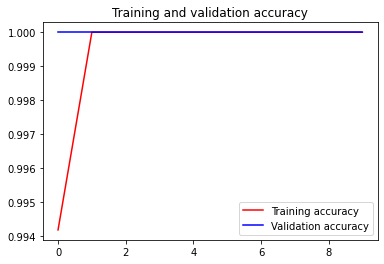

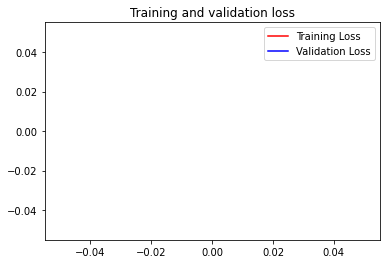

In [12]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']# Your Code Here
val_acc =history.history['val_accuracy'] # Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
score = model.evaluate(test_generator, verbose = 0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: nan
Test accuracy: 1.0
